# Import


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Code

In [2]:
df = pd.read_csv(r"C:\Users\nidhi\Downloads\class.csv")
df.head()

,Native English Speaker,Course Instructor,Course,Summer or regular,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
X = df.drop('Class attribute',axis='columns')
y = df['Class attribute']

In [4]:
X

,Native English Speaker,Course Instructor,Course,Summer or regular,Class size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [5]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class attribute, Length: 151, dtype: int64

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train.shape, y_train.shape

((105, 5), (105,))

In [8]:
X_test.shape,y_test.shape

((46, 5), (46,))

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [10]:
metrics.accuracy_score(y_test,y_pred)

0.717391304347826

In [11]:
clf.score(X_train,y_train)

0.9714285714285714

In [12]:
clf.score(X_test,y_test)

0.717391304347826

# Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  2,  1],
       [ 3, 12,  1],
       [ 4,  2, 10]], dtype=int64)

# Decision Tree

In [14]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    clf = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=10,random_state=10)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    validation_accuracy.append(clf.score(X_test,y_test))

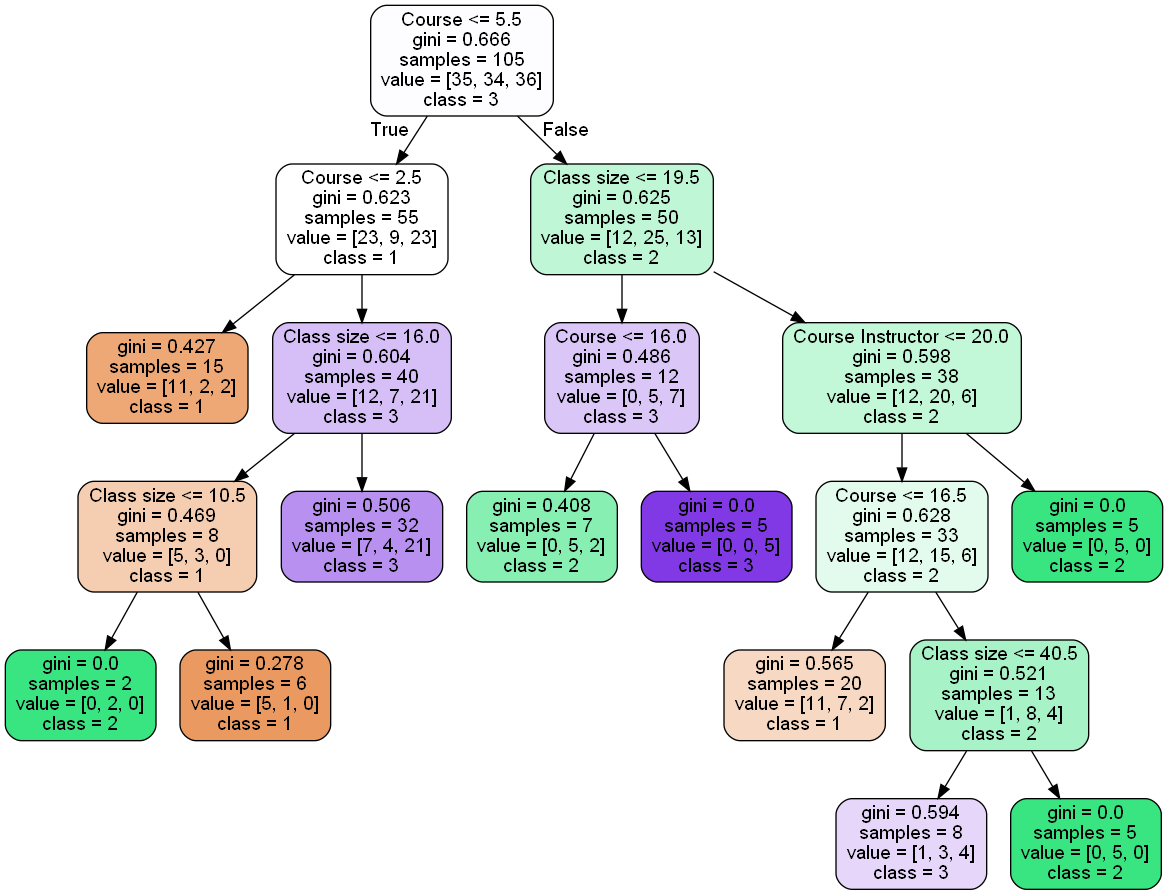

In [15]:
ddata=tree.export_graphviz(clf,out_file=None,filled=True,rounded=True,
                           feature_names=['Native English Speaker', 'Course Instructor',
                                         'Course','Summer or regular','Class size'],
                          class_names=['1','2','3'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))